In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection/creditcard.csv


In [2]:
!pip install scikit-learn

In [3]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

sns.set(font="SimHei")
mpl.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [4]:

df = pd.read_csv('/kaggle/input/credit-card-fraud-detection/creditcard.csv')
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
features = df.columns[:-1].tolist()
df0 = df.query('Class==0').sample(40000)
df1= df.query('Class==1')
x_nom = df0
x_nov = df1

In [5]:
x_nom

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
227499,145100.0,-1.817702,2.273018,-1.074518,-1.081065,0.867777,-0.835114,1.312271,-0.453079,1.952581,...,-0.746520,-0.935574,0.186024,0.470754,0.013131,0.107543,0.833317,0.288361,-0.313728,0
183385,125775.0,-2.953174,-4.269141,0.343218,-0.346813,3.324868,-1.998896,-1.236927,0.099560,-0.809489,...,0.337262,0.160959,0.602487,-1.180364,0.574360,0.093851,-0.250121,-0.035834,0.502361,0
196465,131524.0,-1.271958,-0.662315,1.980895,-2.812335,-1.702447,-0.541807,-1.087229,0.643767,-1.580045,...,-0.105310,-0.180290,-0.113681,-0.032795,0.368617,-0.198498,0.173327,0.015001,-0.141331,0
55362,46902.0,1.437530,-0.878807,0.024109,-2.480950,-0.851543,-0.228617,-0.803017,-0.055612,0.115818,...,-0.218953,-0.014676,-0.212643,-0.787796,0.579474,0.139298,0.047000,0.005534,-0.292578,0
185373,126640.0,0.387825,0.238460,-0.222115,-1.614708,0.331432,-1.480225,0.832423,-0.503681,-0.918951,...,-0.028541,0.022156,-0.099051,-0.109711,-0.320293,-0.378706,-0.123232,-0.166741,-0.305252,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241247,150947.0,-0.370972,0.867603,0.357651,-0.010793,1.136680,-0.440520,0.715102,0.020878,-0.842572,...,-0.208010,-0.643989,-0.041258,0.685425,-0.373573,0.317154,0.080205,0.160432,-0.349271,0
185937,126883.0,-0.219683,-0.785513,0.369937,-2.647337,-0.510031,-0.654437,0.252103,-0.081490,-2.462036,...,-0.243131,-0.649098,0.257341,-0.449847,-0.571267,-0.476253,0.105746,0.163359,0.060573,0
167252,118571.0,-1.180422,1.354254,0.166147,1.158645,0.072264,-0.042392,-0.726377,-3.712670,-0.470332,...,-0.713517,-0.035479,0.602459,0.017252,-0.588138,-0.189947,0.083737,0.155559,-0.333239,0
256104,157540.0,2.241543,-0.650983,-1.636777,-0.740762,-0.427599,-1.514323,-0.047025,-0.464920,-0.453119,...,0.174134,0.597164,0.033687,0.082264,0.280254,-0.043443,-0.057763,-0.075802,-0.313249,0


In [6]:
x_nov

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [7]:
#划分训练集和测试集
x_train, x_nom_test = train_test_split(x_nom.drop(labels=['Time','Class'],axis=1), train_size = 0.85, random_state = 1)
x_test = np.concatenate([x_nom_test,x_nov.drop(labels=['Time','Class'],axis=1)],axis = 0)
y_test = np.concatenate([np.zeros(len(x_nom_test)),np.ones(len(x_nov))])

In [18]:
x_train

tensor([[ 2.1510, -0.0705, -2.5720,  ..., -0.1038, -0.0949, -0.3502],
        [ 1.9609, -0.2402, -0.2440,  ...,  0.0443, -0.0274, -0.2933],
        [ 0.6828, -2.4176, -2.8200,  ..., -0.1929,  0.0205,  2.3592],
        ...,
        [ 0.5688, -2.5586,  0.5212,  ..., -0.0143,  0.0936,  1.3940],
        [ 1.2602, -0.8333,  0.4010,  ...,  0.0137,  0.0152, -0.1293],
        [-0.5906,  0.3943,  1.7899,  ..., -0.1661, -0.0779, -0.2373]])

In [19]:
x_test

tensor([[ 1.8244e+00, -8.0492e-01, -2.2973e+00,  ...,  1.4366e-02,
         -3.4939e-02,  4.2581e-02],
        [-1.2065e+00,  9.4428e-01,  7.4668e-01,  ...,  3.8386e-01,
         -7.6733e-02, -1.9347e-01],
        [-2.4290e+00, -2.4680e+00,  1.5950e+00,  ..., -4.5797e-02,
          1.6708e-01,  1.4419e+00],
        ...,
        [-6.7614e-01,  1.1264e+00, -2.2137e+00,  ...,  3.8511e-01,
          1.9436e-01, -4.1818e-02],
        [-3.1138e+00,  5.8586e-01, -5.3997e+00,  ...,  8.8488e-01,
         -2.5370e-01,  6.2630e-01],
        [ 1.9920e+00,  1.5848e-01, -2.5834e+00,  ...,  2.9876e-03,
         -1.5309e-02, -1.8319e-01]])

In [20]:
y_test

array([0., 0., 0., ..., 1., 1., 1.])

In [8]:
#做数据格式的改变到张量
x_train = np.array(x_train)
x_test = np.array(x_test)
 
x_train,x_test = torch.FloatTensor(x_train),torch.FloatTensor(x_test)
 
#将训练数据处理为数据加载器
train_set = TensorDataset(x_train)
train_loader = DataLoader(dataset=train_set, batch_size=64, shuffle=True)

In [9]:
encoding_dim = 12
input_dim = x_train.shape[1]

In [10]:
class AutoEncoder(nn.Module):
    
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU(),
            nn.Linear(encoding_dim, 4),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(4, encoding_dim),
            nn.ReLU(),
            nn.Linear(encoding_dim, input_dim)
        )
        
    def forward(self, input):
        output = self.encoder(input)
        output = self.decoder(output)
        return output

In [11]:
# hoho
lossfunc = nn.MSELoss()
test1 = torch.tensor([[1.0, 20.0, 23.32], [8.0, 5.832, 52.2]])
test2 = torch.tensor([[10.0, 223.45, 63.32], [8.0, 5.832, 52.2]])
lossfunc(test1, test2)

tensor(7178.8169)

Epoch 1 / 50, loss" 1.05864
Epoch 2 / 50, loss" 1.04473
Epoch 3 / 50, loss" 1.03393
Epoch 4 / 50, loss" 1.02346
Epoch 5 / 50, loss" 1.01167
Epoch 6 / 50, loss" 0.998146
Epoch 7 / 50, loss" 0.984567
Epoch 8 / 50, loss" 0.971574
Epoch 9 / 50, loss" 0.95936
Epoch 10 / 50, loss" 0.947084
Epoch 11 / 50, loss" 0.934372
Epoch 12 / 50, loss" 0.920545
Epoch 13 / 50, loss" 0.905379
Epoch 14 / 50, loss" 0.889321
Epoch 15 / 50, loss" 0.873159
Epoch 16 / 50, loss" 0.856998
Epoch 17 / 50, loss" 0.8419
Epoch 18 / 50, loss" 0.827897
Epoch 19 / 50, loss" 0.814484
Epoch 20 / 50, loss" 0.801856
Epoch 21 / 50, loss" 0.790216
Epoch 22 / 50, loss" 0.779375
Epoch 23 / 50, loss" 0.769536
Epoch 24 / 50, loss" 0.760525
Epoch 25 / 50, loss" 0.752225
Epoch 26 / 50, loss" 0.744578
Epoch 27 / 50, loss" 0.737527
Epoch 28 / 50, loss" 0.731047
Epoch 29 / 50, loss" 0.724978
Epoch 30 / 50, loss" 0.719338
Epoch 31 / 50, loss" 0.71425
Epoch 32 / 50, loss" 0.709528
Epoch 33 / 50, loss" 0.705202
Epoch 34 / 50, loss" 0.70120

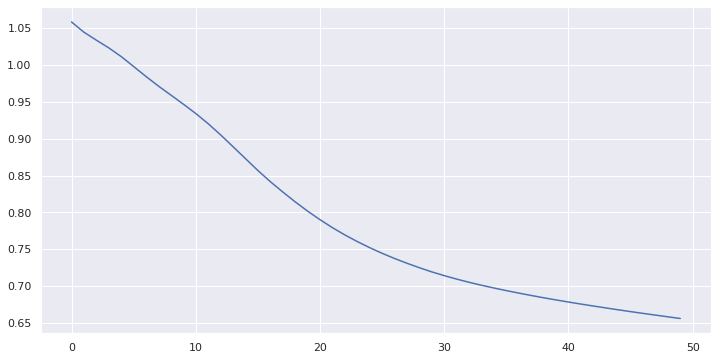

In [12]:
model = AutoEncoder()

NUM_EPOCHS = 50
LEARNING_RATE = 5e-5

optimizer = optim.Adam(model.parameters(), LEARNING_RATE)
loss_func = nn.MSELoss()
all_loss = []
for epoch in range(NUM_EPOCHS):
    total_loss = 0
    for step, (x, ) in enumerate(train_loader):
        x_recon = model(x)
        loss = loss_func(x_recon, x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item() * len(x)
        
#         print(f'x: {x.size()}, loss: {loss.item()}')
        
    total_loss /= len(train_set)
    all_loss.append(total_loss)
    
    print(f'Epoch {epoch + 1} / {NUM_EPOCHS}, loss" {total_loss:.6}')

plt.figure(figsize = (12, 6))
plt.plot(range(NUM_EPOCHS), all_loss)
plt.show()

In [13]:
def get_recon_err(X):
    return torch.mean((model(X) - X) ** 2, dim = 1).detach().numpy()

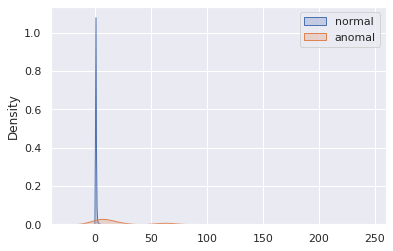

In [14]:
recon_err_train = get_recon_err(x_train)
recon_err_test = get_recon_err(x_test)
recon_err = np.concatenate([recon_err_train, recon_err_test])
labels = np.concatenate([np.zeros(len(recon_err_train)), y_test])
index = np.arange(0, len(labels))

sns.kdeplot(recon_err[labels == 0], shade = True, label = 'normal')
sns.kdeplot(recon_err[labels == 1], shade = True, label = 'anomal')
plt.legend()
plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

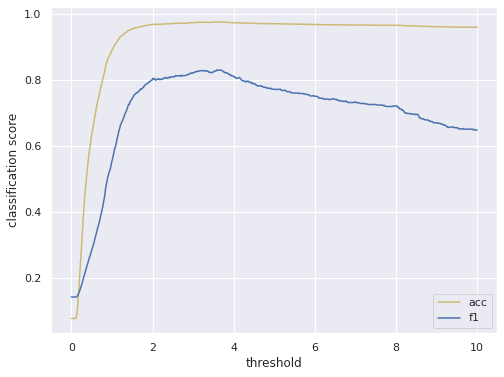

threshold: 3.58, f1 socre: 0.829


In [22]:
threshold = np.linspace(0, 10, 1000)
acc_list = []
f1_list = []

for t in threshold:
    y_pred = (recon_err_test > t).astype(np.int)
    acc_list.append(accuracy_score(y_pred, y_test))
    f1_list.append(f1_score(y_pred, y_test))
    
plt.figure(figsize = (8, 6))
plt.plot(threshold, acc_list, c = 'y', label = 'acc')
plt.plot(threshold, f1_list, c = 'b', label = 'f1')
plt.xlabel('threshold')
plt.ylabel('classification score')
plt.legend()
plt.show()

i = np.argmax(f1_list)
t = threshold[i]
score = f1_list[i]
print(f'threshold: {t:.3}, f1 socre: {score:.3}')

In [29]:
class Visualization:
    
    labels = ['Normal', 'Anomaly']
    
    def draw_confusion_matrix(self, y, ypred):
        matrix = confusion_matrix(y, ypred)
        
        plt.figure(figsize = (10, 8))
        colors = ['orange', 'green']
        sns.heatmap(matrix, xticklabels = self.labels, yticklabels = self.labels, cmap = colors, annot = True, fmt = 'd')
        plt.title('Confusion Matrix')
        plt.ylabel('Actual')
        plt.xlabel('Prdicted')
        plt.show()
        
    
    def draw_anomaly(self, y, error, threshold):
        groupSDF = pd.DataFrame({'error': error,
                                 'true': y}).groupby('true')
        
        figure, axes = plt.subplots(figsize=(12, 8))
 
        for name, group in groupSDF:
            axes.plot(group.index, 
                      group.error, 
                      marker='x' if name == 1 else 'o', 
                      linestyle='',
                      color='r' if name == 1 else 'g', 
                      label="Anomaly" if name == 1 else "Normal")
 
        axes.hlines(threshold, axes.get_xlim()[0], axes.get_xlim()[1], colors='b', zorder=100, label="Threshold")
        axes.legend()
 
        plt.title("Anomalies")
        plt.ylabel("Error")
        plt.xlabel("Data")
        plt.show()
 

    def draw_error(self, error, threshold):
        plt.plot(error, marker='o', ms=3.5, linestyle='', label='Point')
        plt.hlines(threshold, xmin=0, xmax=len(error) - 1, colors='b', zorder=100, label='Threshold')
        plt.legend()
        plt.title("Reconstruction error")
        plt.ylabel("Error")
        plt.xlabel("Data")
        plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


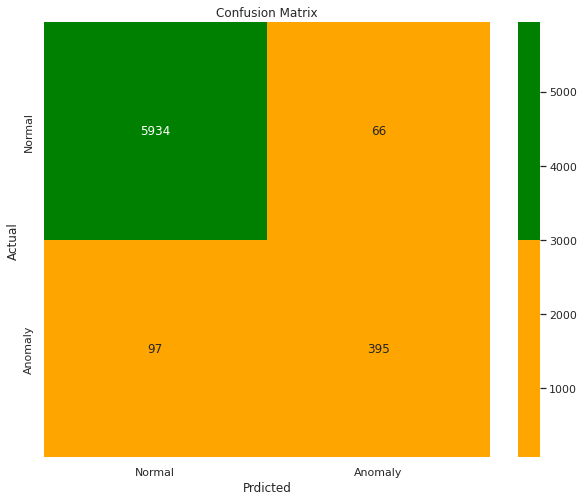

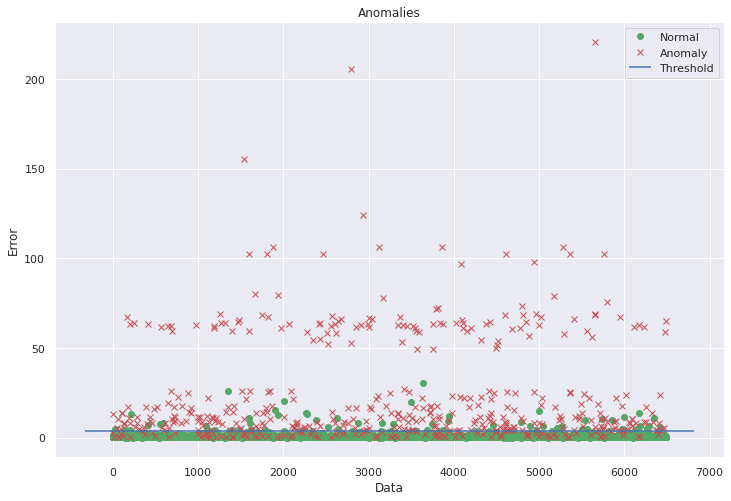

In [30]:
i = np.argmax(f1_list)
t = threshold[i]
y_pred = (recon_err_test > t).astype(np.int)

viz = Visualization()
viz.draw_confusion_matrix(y_test, y_pred)
viz.draw_anomaly(y_test, recon_err_test, t)

In [31]:
import random

c = list(zip(y_test, y_pred,recon_err_test))
random.Random(100).shuffle(c)
y_test, y_pred, recon_err_test = zip(*c)

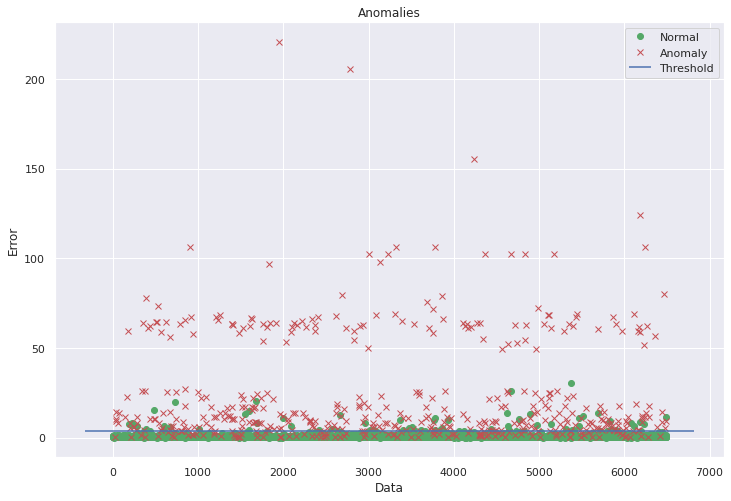

In [32]:
viz.draw_anomaly(y_test, recon_err_test, t)

In [33]:
groupSDF = pd.DataFrame({'error': recon_err_test,
                         'true': y_test})

In [36]:
groupSDF

,error,true
0,0.312135,0.0
1,0.354279,0.0
2,0.226960,0.0
3,1.102253,0.0
4,0.805807,0.0
...,...,...
6487,0.183916,0.0
6488,1.119775,0.0
6489,0.339760,0.0
6490,0.279046,0.0


In [46]:
l = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]
df = pd.DataFrame(l, columns=["a", "b", "c"])
df

,a,b,c
0,1,2.0,3
1,1,NaN,4
2,2,1.0,3
3,1,2.0,2


In [52]:
for name, group in df.groupby("b"):
    print(f'name = {name}, group:')
    print(f'{group}')

name = 1.0, group:
   a    b  c
2  2  1.0  3
name = 2.0, group:
   a    b  c
0  1  2.0  3
3  1  2.0  2
